In [1]:
import pandas as pd
import json
from pprint import pprint
import pandas as pd
import scipy as sp
import csv

import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn import preprocessing
from fbprophet import Prophet

In [2]:
headers = ["ds", "y"]

df = pd.read_csv('output.csv', names = headers)



df['ds'] = pd.to_datetime(df['ds'])

In [3]:
df.head()

ds         y
0 2018-07-04 16:43:09.026372  0.000043
1 2018-07-05 16:43:10.094603  0.000043
2 2018-07-06 16:43:11.155122  0.000043
3 2018-07-07 16:43:12.204823  0.000043
4 2018-07-08 16:43:13.263053  0.000043

In [4]:
df['y'] = np.log(df['y'])

m = Prophet()

m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 7.0.
/usr/local/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)


In [5]:
future = m.make_future_dataframe(periods=10)
future.tail()

ds
15 2018-07-19 16:43:18.555196
16 2018-07-20 16:43:18.555196
17 2018-07-21 16:43:18.555196
18 2018-07-22 16:43:18.555196
19 2018-07-23 16:43:18.555196

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds       yhat  yhat_lower  yhat_upper
15 2018-07-19 16:43:18.555196 -10.051524  -10.051524  -10.051523
16 2018-07-20 16:43:18.555196 -10.051524  -10.051524  -10.051523
17 2018-07-21 16:43:18.555196 -10.051524  -10.051524  -10.051523
18 2018-07-22 16:43:18.555196 -10.051524  -10.051524  -10.051523
19 2018-07-23 16:43:18.555196 -10.051524  -10.051524  -10.051523

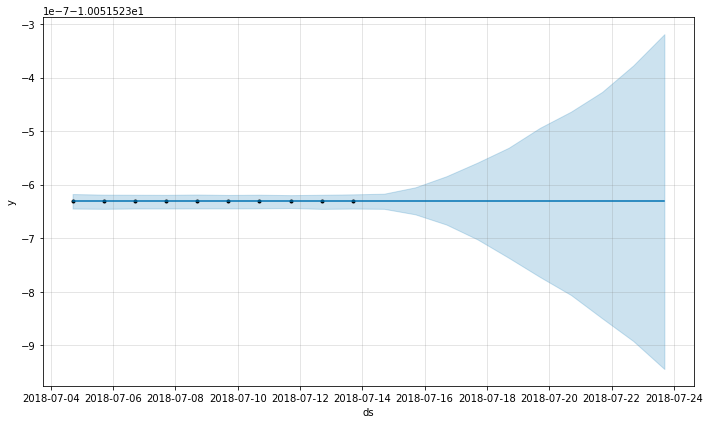

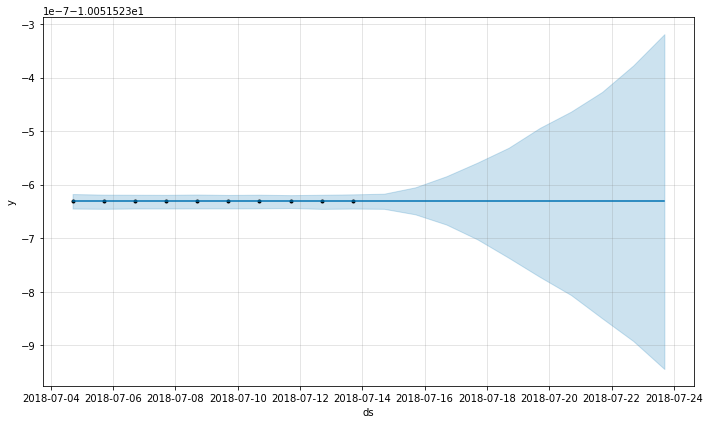

In [7]:
m.plot(forecast)

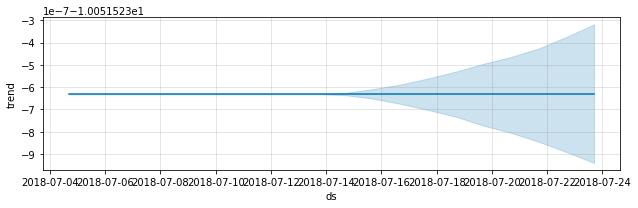

In [8]:
m.plot_components(forecast);

In [9]:
x = ['datetime']
y = ['mona_revenue']

In [10]:
df = df.sort_values('datetime', ascending=True)

KeyError: 'datetime'

In [11]:
plt.plot(df['count'], df['mona_revenue'])
plt.plot(df['count'], df['zcash_revenue'])
plt.xticks(rotation='vertical')

KeyError: 'count'

In [12]:
x = np.array(df['count'])
y_mona = np.array(df['mona_revenue'])
y_zcash = np.array(df['zcash_revenue'])

KeyError: 'count'

In [ ]:
plt.plot(x, np.poly1d(np.polyfit(x, y_mona, 3))(x))
plt.plot(df['count'], df['mona_revenue'])
plt.plot(x, np.poly1d(np.polyfit(x, y_zcash, 3))(x))
plt.plot(df['count'], df['zcash_revenue'])